In [ ]:
from google.colab import drive
drive.mount('gdrive')

%cd '/content/gdrive/My Drive/Project/MUSH_IMG/try_2/'

Mounted at gdrive
/content/gdrive/My Drive/Project/MUSH_IMG/try_2


In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 141 µs (started: 2021-03-02 05:20:24 +00:00)


In [ ]:
import os
print(os.listdir('/content/gdrive/My Drive/Project/MUSH_IMG/try_2/'))

['뽕나무버섯', '노란난버섯', '개암버섯', '노란다발버섯', '노란꼭지버섯', '달걀버섯', '개나리광대버섯', '곰보버섯', '혈색무당버섯', '표고버섯', '노란싸리버섯', '붉은싸리버섯', '싸리버섯', '노루궁뎅이버섯', '갈황색미치광이버섯', 'mushroom_model.h5']
time: 2.56 ms (started: 2021-03-02 05:20:24 +00:00)


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

time: 1.71 ms (started: 2021-03-02 05:20:24 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

time: 565 ms (started: 2021-03-02 05:20:24 +00:00)


In [ ]:
#display 설정
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

time: 11.7 ms (started: 2021-03-02 05:20:24 +00:00)


In [ ]:
#모델 선택
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

time: 171 ms (started: 2021-03-02 05:20:24 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Activation, Dense, Input
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import *

time: 1.42 s (started: 2021-03-02 05:20:25 +00:00)


In [ ]:
# 이미지 전처리
from keras.preprocessing.image import ImageDataGenerator

time: 45.9 ms (started: 2021-03-02 05:20:26 +00:00)


In [ ]:
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

time: 1.81 ms (started: 2021-03-02 05:20:26 +00:00)


In [ ]:
# CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import *

import tensorflow as tf
import random as rn

time: 2.54 ms (started: 2021-03-02 05:20:26 +00:00)


In [ ]:
#이미지의 픽셀의 numpy array 얻기
import cv2                  
import numpy as np  
from tqdm import tqdm # 진행률표시바
import os   #파일 불러오기                
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

time: 593 ms (started: 2021-03-02 05:20:26 +00:00)


In [ ]:
resnet50 = ResNet50(weights='imagenet',
              input_shape=(150, 150, 3), include_top=False)

94773248/94765736 [==============================] - 1s 0us/step
time: 7.53 s (started: 2021-03-02 05:20:27 +00:00)


In [ ]:
model = Sequential()
model.add(resnet50)

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                3855      
Total params: 36,700,047
Trainable params: 36,646,415
Non-trainable params: 53,632
_______________________________________

In [ ]:
# VGG16 대신에 써도 되는것들
'''
mobilenet = MobileNet(weights=None, input_shape=None, include_top=True)

resnet50 = ResNet50(weights=None, input_shape=None, include_top=True)

xception = Xcecption(weights=None, input_shape=None, include_top=True)
'''

'\nmobilenet = MobileNet(weights=None, input_shape=None, include_top=True)\n\nresnet50 = ResNet50(weights=None, input_shape=None, include_top=True)\n\nxception = Xcecption(weights=None, input_shape=None, include_top=True)\n'

time: 3.84 ms (started: 2021-03-02 05:20:35 +00:00)


****************전처리*********************


In [ ]:
# 버섯 사이즈 설정 & 이미지 불러오기

X=[]
Z=[]
IMG_SIZE=150

MUSH_1_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/뽕나무버섯'
MUSH_2_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/갈황색미치광이버섯'
MUSH_3_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/노란싸리버섯'
MUSH_4_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/붉은싸리버섯'
MUSH_5_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/싸리버섯'
MUSH_6_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/개암버섯'
MUSH_7_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/노란꼭지버섯'
MUSH_8_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/노란난버섯'
MUSH_9_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/노란다발버섯'
MUSH_10_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/달걀버섯'
MUSH_11_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/곰보버섯'
MUSH_12_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/개나리광대버섯'
MUSH_13_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/혈색무당버섯'
MUSH_14_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/표고버섯'
MUSH_15_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_2/노루궁뎅이버섯'

time: 10.6 ms (started: 2021-03-02 05:20:35 +00:00)


In [ ]:
def assign_label(img, mushroom_type):
  return mushroom_type

time: 1.06 ms (started: 2021-03-02 05:20:35 +00:00)


In [ ]:
def make_train_data(mushroom_type,DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img,mushroom_type)
    path = os.path.join(DIR,img) # 기존의 경로와 새로운 경로를 합쳐 하위 경로 만듦
    img = cv2.imread(path,cv2.IMREAD_COLOR) # cv2.imread(이미지 경로, 파일 읽을 때 옵션)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) #cv2.resize(조절할 이미지, 이미지크기)
    
    X.append(np.array(img))
    Z.append(str(label))

time: 4.88 ms (started: 2021-03-02 05:20:35 +00:00)


In [ ]:
make_train_data('뽕나무버섯', MUSH_1_DIR)
print(len(X))

100%|██████████| 188/188 [00:42<00:00,  4.41it/s]

188
time: 42.6 s (started: 2021-03-02 05:20:35 +00:00)


In [ ]:
make_train_data('갈황색미치광이버섯',MUSH_2_DIR)
print(len(X))

100%|██████████| 180/180 [00:42<00:00,  4.22it/s]

368
time: 42.7 s (started: 2021-03-02 05:21:17 +00:00)


In [ ]:
make_train_data('노란싸리버섯',MUSH_3_DIR)
print(len(X))

100%|██████████| 98/98 [00:22<00:00,  4.41it/s]

466
time: 22.2 s (started: 2021-03-02 05:22:00 +00:00)


In [ ]:
make_train_data('붉은싸리버섯',MUSH_4_DIR)
print(len(X))

100%|██████████| 179/179 [00:41<00:00,  4.30it/s]

645
time: 41.7 s (started: 2021-03-02 05:22:22 +00:00)


In [ ]:
make_train_data('싸리버섯',MUSH_5_DIR)
print(len(X))

100%|██████████| 167/167 [00:38<00:00,  4.31it/s]

812
time: 38.8 s (started: 2021-03-02 05:23:04 +00:00)


In [ ]:
make_train_data('개암버섯',MUSH_6_DIR)
print(len(X))

100%|██████████| 188/188 [00:44<00:00,  4.27it/s]

1000
time: 44 s (started: 2021-03-02 05:23:43 +00:00)


In [ ]:
make_train_data('노란꼭지버섯',MUSH_7_DIR)
print(len(X))

100%|██████████| 150/150 [00:36<00:00,  4.12it/s]

1150
time: 36.4 s (started: 2021-03-02 05:24:27 +00:00)


In [ ]:
make_train_data('노란난버섯',MUSH_8_DIR)
print(len(X))

100%|██████████| 148/148 [00:34<00:00,  4.29it/s]

1298
time: 34.5 s (started: 2021-03-02 05:25:03 +00:00)


In [ ]:
make_train_data('노란다발버섯',MUSH_9_DIR)
print(len(X))

100%|██████████| 146/146 [00:33<00:00,  4.38it/s]

1444
time: 33.3 s (started: 2021-03-02 05:25:38 +00:00)


In [ ]:
make_train_data('달걀버섯',MUSH_10_DIR)
print(len(X))

100%|██████████| 181/181 [00:42<00:00,  4.30it/s]

1625
time: 42.1 s (started: 2021-03-02 05:26:11 +00:00)


In [ ]:
make_train_data('곰보버섯',MUSH_11_DIR)
print(len(X))

100%|██████████| 175/175 [00:41<00:00,  4.20it/s]

1800
time: 41.7 s (started: 2021-03-02 05:26:53 +00:00)


In [ ]:
make_train_data('개나리광대버섯',MUSH_12_DIR)
print(len(X))

100%|██████████| 152/152 [00:34<00:00,  4.37it/s]

1952
time: 34.8 s (started: 2021-03-02 05:27:35 +00:00)


In [ ]:
make_train_data('혈색무당버섯',MUSH_13_DIR)
print(len(X))

100%|██████████| 138/138 [00:34<00:00,  4.00it/s]

2090
time: 34.5 s (started: 2021-03-02 05:28:10 +00:00)


In [ ]:
make_train_data('표고버섯',MUSH_14_DIR)
print(len(X))

100%|██████████| 98/98 [00:23<00:00,  4.17it/s]

2188
time: 23.5 s (started: 2021-03-02 05:28:44 +00:00)


In [ ]:
make_train_data('노루궁뎅이버섯',MUSH_15_DIR)
print(len(X))

100%|██████████| 99/99 [00:23<00:00,  4.18it/s]

2287
time: 23.7 s (started: 2021-03-02 05:29:08 +00:00)


In [ ]:
print(Z)

['뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', 

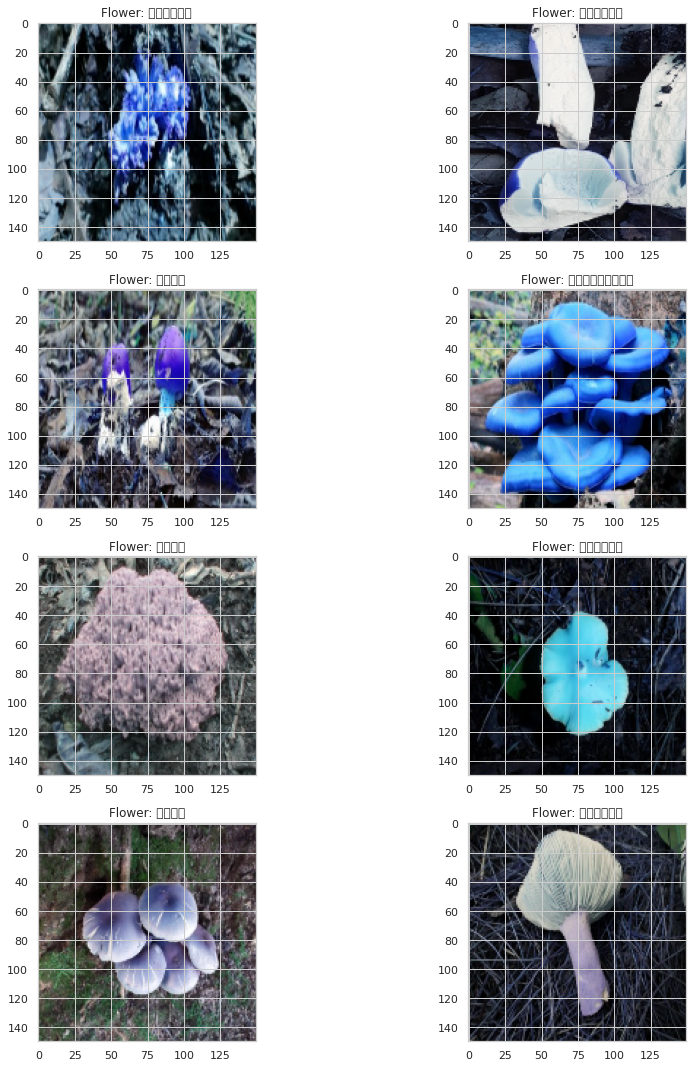

time: 2.5 s (started: 2021-03-02 05:29:31 +00:00)


In [ ]:
# 랜덤으로 뽑은 이미지
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
  for j in range(2):
    l = rn.randint(0,len(Z)) #
    ax[i,j].imshow(X[l])
    ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()

In [ ]:
# ONE - HOT ENCODING
le = LabelEncoder()
Y = le.fit_transform(Z) # fit 하고 transform(정규화) 해줌
Y = to_categorical(Y,15) # to_categorical : one-hot encoding해주는 함수
X = np.array(X)
X = X/255 # 0~255 픽셀값을 바꿔주는거???

time: 551 ms (started: 2021-03-02 05:29:34 +00:00)


In [ ]:
# Train data와 Test data 나누기
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

time: 375 ms (started: 2021-03-02 05:29:34 +00:00)


In [ ]:
# 랜덤 시드 설정
np.random.seed(42) #한번 발생한 난수를 기억하게 해줌
rn.seed(42)
tf.random.set_seed(42)

time: 2 ms (started: 2021-03-02 05:29:35 +00:00)


In [ ]:
# CNN으로 modeling
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3))) #padding : 아웃풋의 크기를 일정하게 유지
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten()) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(15, activation = "softmax"))

time: 81.3 ms (started: 2021-03-02 05:29:35 +00:00)


In [ ]:
batch_size=32
epochs=70

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

time: 2.07 ms (started: 2021-03-02 05:29:35 +00:00)


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

time: 363 ms (started: 2021-03-02 05:29:35 +00:00)


In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

time: 13.7 ms (started: 2021-03-02 05:29:35 +00:00)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)       

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/70
53/53 [==============================] - 16s 167ms/step - loss: 2.7056 - accuracy: 0.0716 - val_loss: 2.6704 - val_accuracy: 0.0769
Epoch 2/70
53/53 [==============================] - 8s 157ms/step - loss: 2.6542 - accuracy: 0.0884 - val_loss: 2.5686 - val_accuracy: 0.1399
Epoch 3/70
53/53 [==============================] - 8s 156ms/step - loss: 2.5500 - accuracy: 0.1392 - val_loss: 2.3411 - val_accuracy: 0.1923
Epoch 4/70
53/53 [==============================] - 8s 159ms/step - loss: 2.4056 - accuracy: 0.1821 - val_loss: 2.2817 - val_accuracy: 0.2395
Epoch 5/70
53/53 [==============================] - 8s 157ms/step - loss: 2.2727 - accuracy: 0.2326 - val_loss: 2.1381 - val_accuracy: 0.2710
Epoch 6/70
53/53 [==============================] - 8s 156ms/step - loss: 2.2045 - accuracy: 0.2508 - val_loss: 2.1222 - val_accuracy: 0.2955
Epoch 7/70
53/53 [==============================] - 8s 156ms/step - loss: 2.2133 - accuracy: 0.2327 - val_loss: 2.1034 - val_accuracy: 0.2867
Epoch

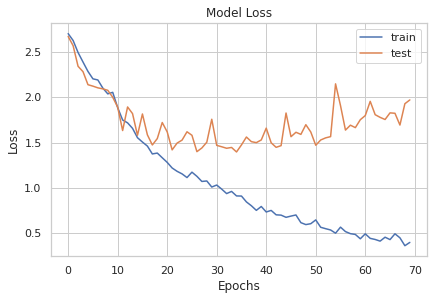

time: 241 ms (started: 2021-03-02 05:39:31 +00:00)


In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

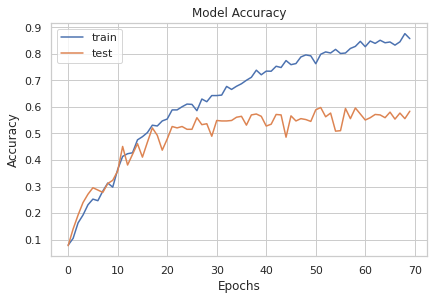

time: 250 ms (started: 2021-03-02 05:39:32 +00:00)


In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# 모델 저장
model.save("mushroom_model.h5")

time: 617 ms (started: 2021-03-02 05:39:32 +00:00)


**전이 모델 사용**

In [ ]:
# VGG16 대신에 써도 되는것들
'''
mobilenet = MobileNet(weights=None, input_shape=None, include_top=True)

resnet50 = ResNet50(weights=None, input_shape=None, include_top=True)

xception = Xcecption(weights=None, input_shape=None, include_top=True)
'''

'\nmobilenet = MobileNet(weights=None, input_shape=None, include_top=True)\n\nresnet50 = ResNet50(weights=None, input_shape=None, include_top=True)\n\nxception = Xcecption(weights=None, input_shape=None, include_top=True)\n'

time: 5.63 ms (started: 2021-03-02 05:39:32 +00:00)


In [ ]:
conv_base = ResNet50(weights='imagenet',
              input_shape=(150,150,3), include_top=False) #include_top :분류기층을 따로 사용할건지 여부

time: 1.28 s (started: 2021-03-02 05:39:33 +00:00)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

def build_model_with_pretrained(conv_base):
  model = Sequential()
  model.add(conv_base)
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(15, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=0.01),
                metrics=['accuracy'])
  
  return model

time: 5.71 ms (started: 2021-03-02 05:39:34 +00:00)


In [ ]:
model = build_model_with_pretrained(conv_base)
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_5 (Dense)              (None, 15)                3855      
Total params: 36,699,023
Trainable params: 36,645,903
Non-trainable params: 53,120
_________________________________________________________________
time: 402 ms (started: 2021-03-02 05:39:34 +00:00)


In [ ]:
# 가중치 수
print(len(model.trainable_weights))

216
time: 1.71 ms (started: 2021-03-02 05:39:34 +00:00)


In [ ]:
# 가중치 학습을 막기 위해서 동결시킴
conv_base.trainable = False
print(len(model.trainable_weights))

4
time: 8.87 ms (started: 2021-03-02 05:39:34 +00:00)


**모델 컴파일**

In [ ]:
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.01),
                metrics=['accuracy'])

time: 15.1 ms (started: 2021-03-02 05:39:34 +00:00)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

time: 1.38 ms (started: 2021-03-02 05:39:34 +00:00)


In [ ]:
batch_size=32
epochs=100

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

time: 2.73 ms (started: 2021-03-02 05:39:34 +00:00)


In [ ]:
History2 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/100
53/53 [==============================] - 14s 204ms/step - loss: 41.5809 - accuracy: 0.0811 - val_loss: 2.7038 - val_accuracy: 0.0629
Epoch 2/100
53/53 [==============================] - 9s 177ms/step - loss: 2.8692 - accuracy: 0.0654 - val_loss: 2.6966 - val_accuracy: 0.0787
Epoch 3/100
53/53 [==============================] - 10s 181ms/step - loss: 2.6992 - accuracy: 0.0819 - val_loss: 2.6913 - val_accuracy: 0.0787
Epoch 4/100
53/53 [==============================] - 10s 180ms/step - loss: 2.8448 - accuracy: 0.0975 - val_loss: 2.6893 - val_accuracy: 0.0787
Epoch 5/100
53/53 [==============================] - 9s 178ms/step - loss: 2.6882 - accuracy: 0.0796 - val_loss: 2.6869 - val_accuracy: 0.0752
Epoch 6/100
53/53 [==============================] - 9s 178ms/step - loss: 2.6887 - accuracy: 0.0879 - val_loss: 2.6872 - val_accuracy: 0.0787
Epoch 7/100
53/53 [==============================] - 10s 180ms/step - loss: 2.6845 - accuracy: 0.0782 - val_loss: 2.6871 - val_accuracy: 0

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()